In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir= r"/content/drive/MyDrive/Datasets/ForestFireDataset/Training"
test_dir= r"/content/drive/MyDrive/Datasets/ForestFireDataset/Testing"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 635s 13s/step - accuracy: 0.8390 - loss: 0.3623
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 337ms/step - accuracy: 0.9415 - loss: 0.1836
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.9557 - loss: 0.1441
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.9689 - loss: 0.1128
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.9684 - loss: 0.0881
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 339ms/step - accuracy: 0.9703 - loss: 0.0949
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.9718 - loss: 0.0794
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.9733 - loss: 0.0731
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 335ms/step - accuracy: 0.9813 - loss: 0.0683
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 334ms/step - accuracy: 0.9835 - loss: 0.0526


In [ ]:
loss, accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 95.79%


In [ ]:
def predict_fire(image_path):
    """
    Loads an image, preprocesses it, and predicts if it contains a forest fire.

    Args:
        image_path (str): The path to the image file.

    Returns:
        str: A message indicating whether a forest fire was detected.
    """
    img = Image.open(image_path)
    img = img.resize((64, 64)) # Resize to match model input size
    img_array = np.array(img) / 255.0 # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        return "Prediction: Forest fire detected."
    else:
        return "Prediction: No forest fire detected."

# Example usage: Replace 'path/to/your/image.jpg' with the actual path to an image
# print(predict_fire('path/to/your/image.jpg'))

In [ ]:
history = model.fit(train_generator, epochs=10, verbose=1)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.9821 - loss: 0.0494
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 336ms/step - accuracy: 0.9914 - loss: 0.0301
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 333ms/step - accuracy: 0.9830 - loss: 0.0514
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 336ms/step - accuracy: 0.9875 - loss: 0.0390
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 334ms/step - accuracy: 0.9870 - loss: 0.0324
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 328ms/step - accuracy: 0.9890 - loss: 0.0298
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - accuracy: 0.9939 - loss: 0.0259
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.9854 - loss: 0.0333
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.9983 - loss: 0.0077
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 333ms/step - accuracy: 0.9974 - loss: 0.0088


In [ ]:
# Save the model
model.save('forest_fire_detection_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('forest_fire_detection_model.keras')
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
# Load the model
import tensorflow as tf

# Load the entire model saved in cell bf800c69
loaded_model = tf.keras.models.load_model('forest_fire_detection_model.keras')

# Now you can use the loaded model for predictions

In [ ]:
# Prepare data for non-CNN model (e.g., SVM)

x_train = []
y_train = []
for i in range(len(train_generator)):
    images, labels = train_generator[i]
    for img, label in zip(images, labels):
        x_train.append(img.flatten())
        y_train.append(label)

x_test = []
y_test = []
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    for img, label in zip(images, labels):
        x_test.append(img.flatten())
        y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (1520, 12288)
Training labels shape: (1520,)
Testing data shape: (380, 12288)
Testing labels shape: (380,)


In [ ]:
from sklearn.svm import SVC

# Instantiate an SVC model with default parameters
svc_model = SVC()

In [ ]:
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVC): {accuracy * 100:.2f}%")

Test Accuracy (SVC): 93.68%


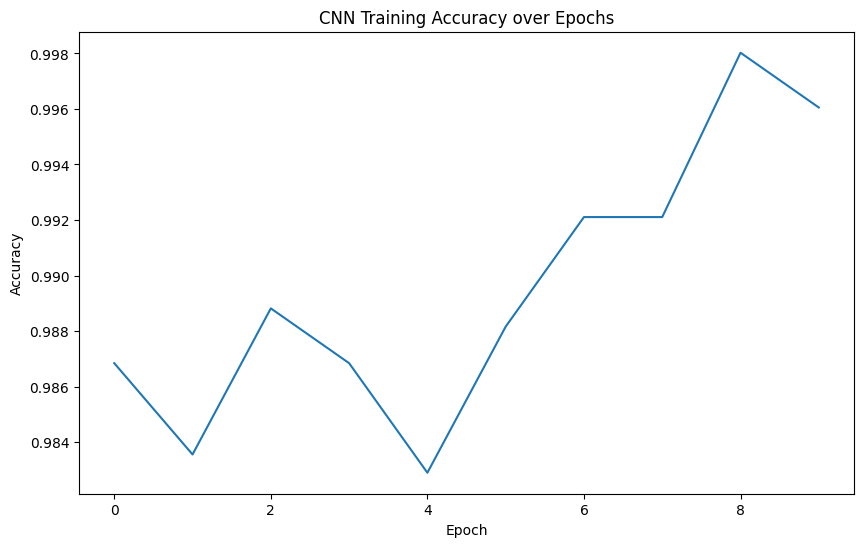

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.title('CNN Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

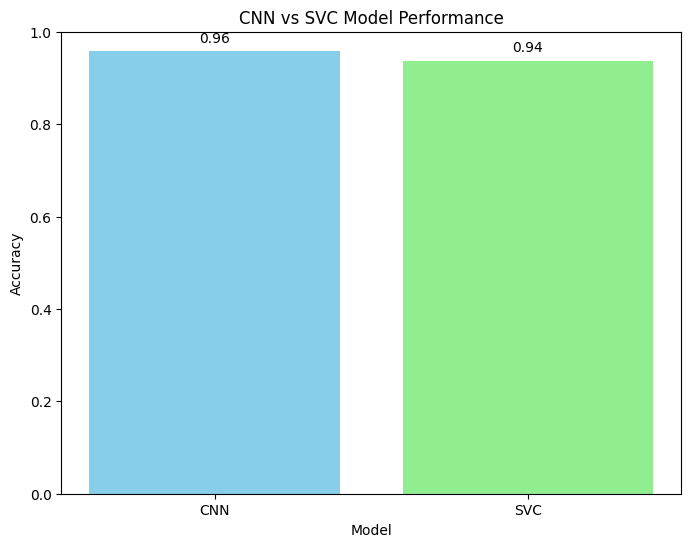

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy of the CNN model from the previous output (cell e9a5debd)
cnn_accuracy = 0.9579

# Assuming cnn_accuracy and accuracy (for SVC) are available
models = ['CNN', 'SVC']
accuracies = [cnn_accuracy, accuracy] # Use the correct variable names for accuracies

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.title('CNN vs SVC Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add text labels for the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')

plt.show()

In [ ]:
print("Checking data availability and shapes:")
print(f"x_train exists: {'x_train' in locals()}")
print(f"y_train exists: {'y_train' in locals()}")
print(f"x_test exists: {'x_test' in locals()}")
print(f"y_test exists: {'y_test' in locals()}")

if 'x_train' in locals():
    print("x_train shape:", x_train.shape)
if 'y_train' in locals():
    print("y_train shape:", y_train.shape)
if 'x_test' in locals():
    print("x_test shape:", x_test.shape)
if 'y_test' in locals():
    print("y_test shape:", y_test.shape)

Checking data availability and shapes:
x_train exists: True
y_train exists: True
x_test exists: True
y_test exists: True
x_train shape: (1520, 12288)
y_train shape: (1520,)
x_test shape: (380, 12288)
y_test shape: (380,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_logistic = logistic_model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Test Accuracy (Logistic Regression): {accuracy_logistic * 100:.2f}%")

Test Accuracy (Logistic Regression): 92.63%


Test Accuracy (CNN): 96.32%
Test Accuracy (SVC): 93.68%
Test Accuracy (Logistic Regression): 92.63%


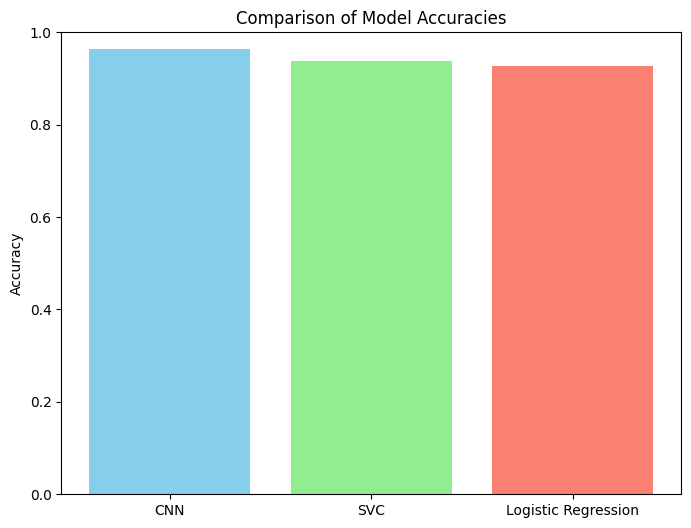

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy of the CNN model from the previous output
cnn_accuracy = 0.9632  # From the output of cell e9a5debd

# Get the accuracy of the SVC model from the previous output
svc_accuracy = accuracy # From the output of cell 037c70d7

# Get the accuracy of the Logistic Regression model from the previous output
logistic_accuracy = accuracy_logistic # From the output of the previous subtask

print(f"Test Accuracy (CNN): {cnn_accuracy * 100:.2f}%")
print(f"Test Accuracy (SVC): {svc_accuracy * 100:.2f}%")
print(f"Test Accuracy (Logistic Regression): {logistic_accuracy * 100:.2f}%")

models = ['CNN', 'SVC', 'Logistic Regression']
accuracies = [cnn_accuracy, svc_accuracy, logistic_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

In [ ]:
print("Checking data availability and shapes:")
print(f"x_train exists: {'x_train' in locals()}")
print(f"y_train exists: {'y_train' in locals()}")
print(f"x_test exists: {'x_test' in locals()}")
print(f"y_test exists: {'y_test' in locals()}")

if 'x_train' in locals():
    print("x_train shape:", x_train.shape)
if 'y_train' in locals():
    print("y_train shape:", y_train.shape)
if 'x_test' in locals():
    print("x_test shape:", x_test.shape)
if 'y_test' in locals():
    print("y_test shape:", y_test.shape)

Checking data availability and shapes:
x_train exists: True
y_train exists: True
x_test exists: True
y_test exists: True
x_train shape: (1520, 12288)
y_train shape: (1520,)
x_test shape: (380, 12288)
y_test shape: (380,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy (KNN): {accuracy_knn * 100:.2f}%")

Test Accuracy (KNN): 84.74%


Test Accuracy (CNN): 96.32%
Test Accuracy (SVC): 93.68%
Test Accuracy (Logistic Regression): 92.63%
Test Accuracy (KNN): 84.74%


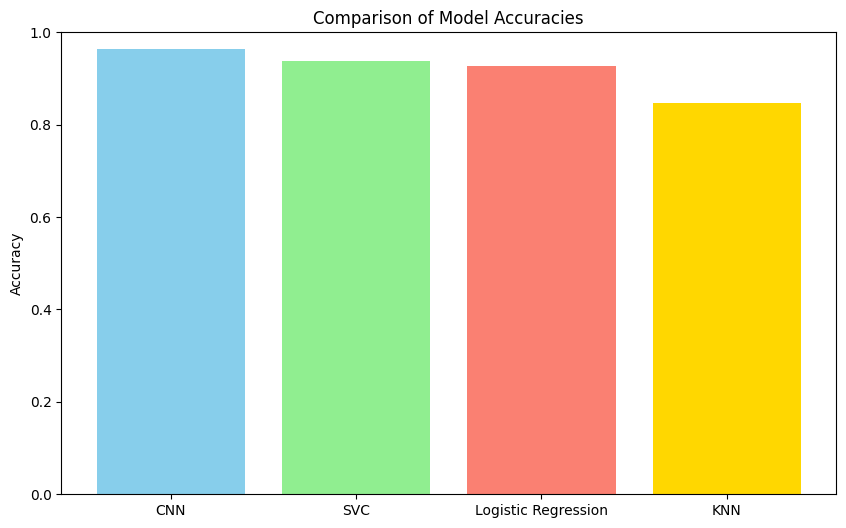

In [ ]:
import matplotlib.pyplot as plt

print(f"Test Accuracy (CNN): {cnn_accuracy * 100:.2f}%")
print(f"Test Accuracy (SVC): {svc_accuracy * 100:.2f}%")
print(f"Test Accuracy (Logistic Regression): {logistic_accuracy * 100:.2f}%")
print(f"Test Accuracy (KNN): {accuracy_knn * 100:.2f}%")

models = ['CNN', 'SVC', 'Logistic Regression', 'KNN']
accuracies = [cnn_accuracy, svc_accuracy, logistic_accuracy, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report for SVC
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred))

# Classification report for Logistic Regression
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))

# Classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Acknowledge limitation for CNN
print("\nNote: Classification metrics for the CNN model would require generating predictions on the test set (x_test) using the trained CNN model.")

Classification Report (SVC):
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       190
         1.0       0.94      0.93      0.94       190

    accuracy                           0.94       380
   macro avg       0.94      0.94      0.94       380
weighted avg       0.94      0.94      0.94       380


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       190
         1.0       0.94      0.91      0.93       190

    accuracy                           0.93       380
   macro avg       0.93      0.93      0.93       380
weighted avg       0.93      0.93      0.93       380


Classification Report (KNN):
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       190
         1.0       0.92      0.76      0.83       190

    accuracy                           0.85       380
   macro avg       0.86

In [ ]:
from sklearn.metrics import classification_report

# Reshape the test data back to image format for the CNN model
x_test_cnn = x_test.reshape(-1, 64, 64, 3)

# Make predictions with the loaded CNN model
y_pred_cnn = loaded_model.predict(x_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int) # Convert probabilities to binary predictions

# Classification report for CNN
print("Classification Report (CNN):")
print(classification_report(y_test, y_pred_cnn))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       190
         1.0       0.97      0.95      0.96       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



In [ ]:
from sklearn.metrics import classification_report

# Reshape the test data back to image format for the CNN model
x_test_cnn = x_test.reshape(-1, 64, 64, 3)

# Make predictions with the loaded CNN model
y_pred_cnn = loaded_model.predict(x_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int) # Convert probabilities to binary predictions

# Classification report for CNN
print("Classification Report (CNN):")
print(classification_report(y_test, y_pred_cnn))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       190
         1.0       0.97      0.95      0.96       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


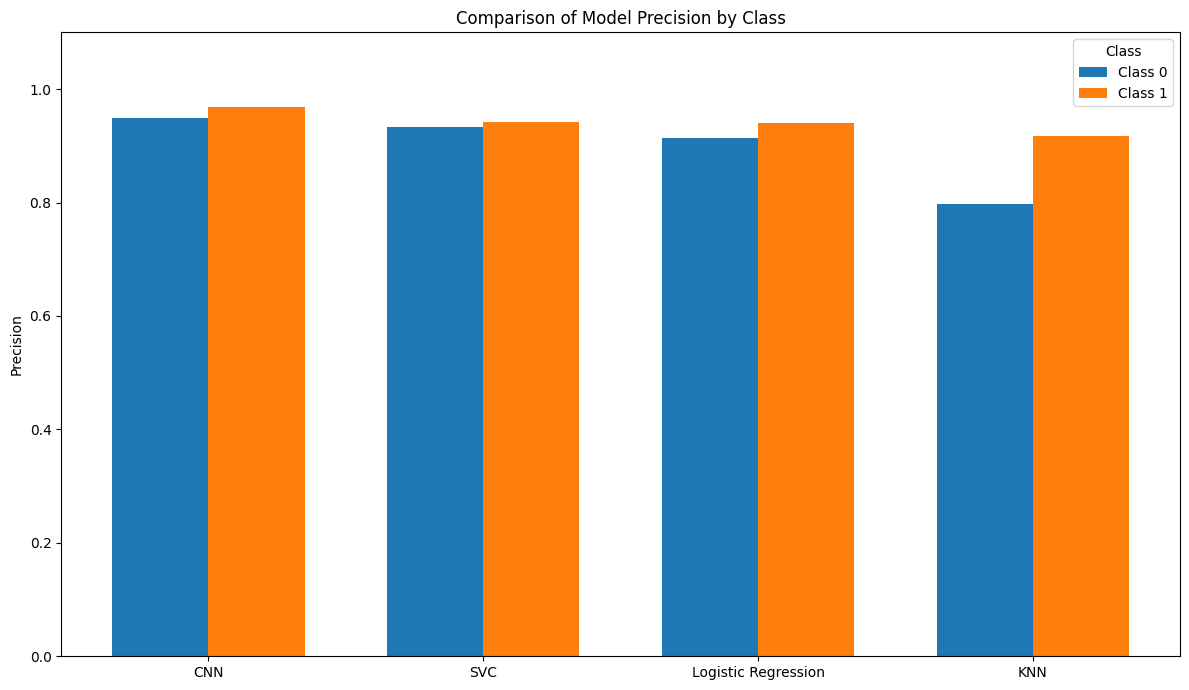

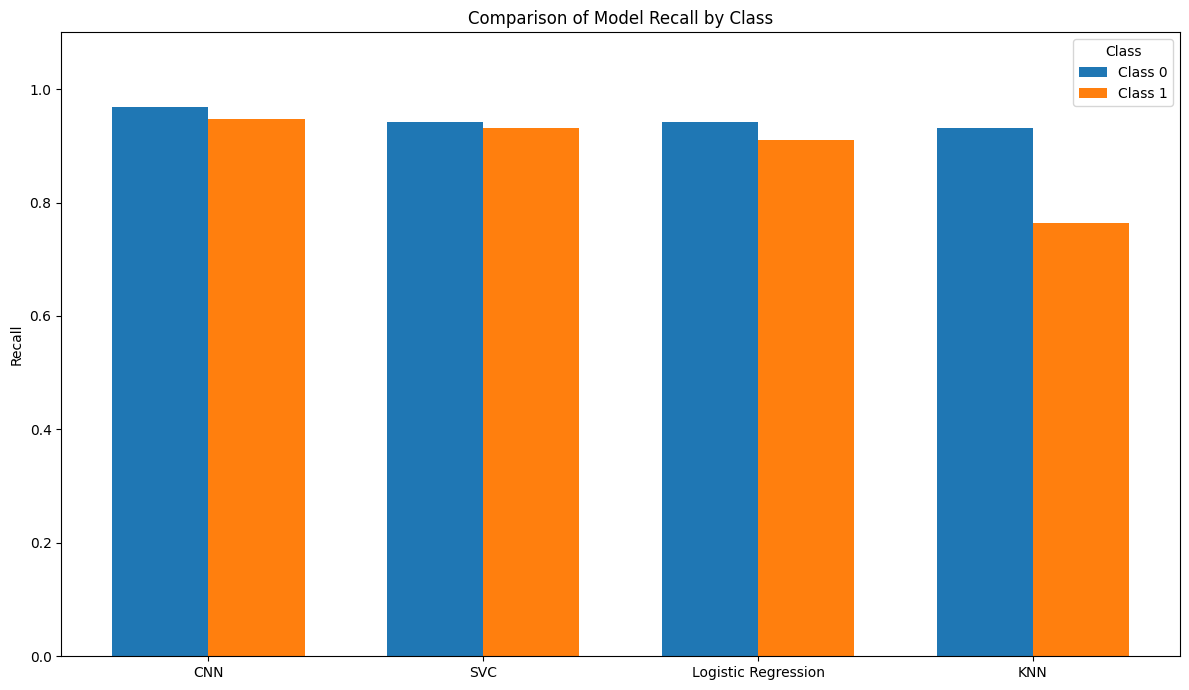

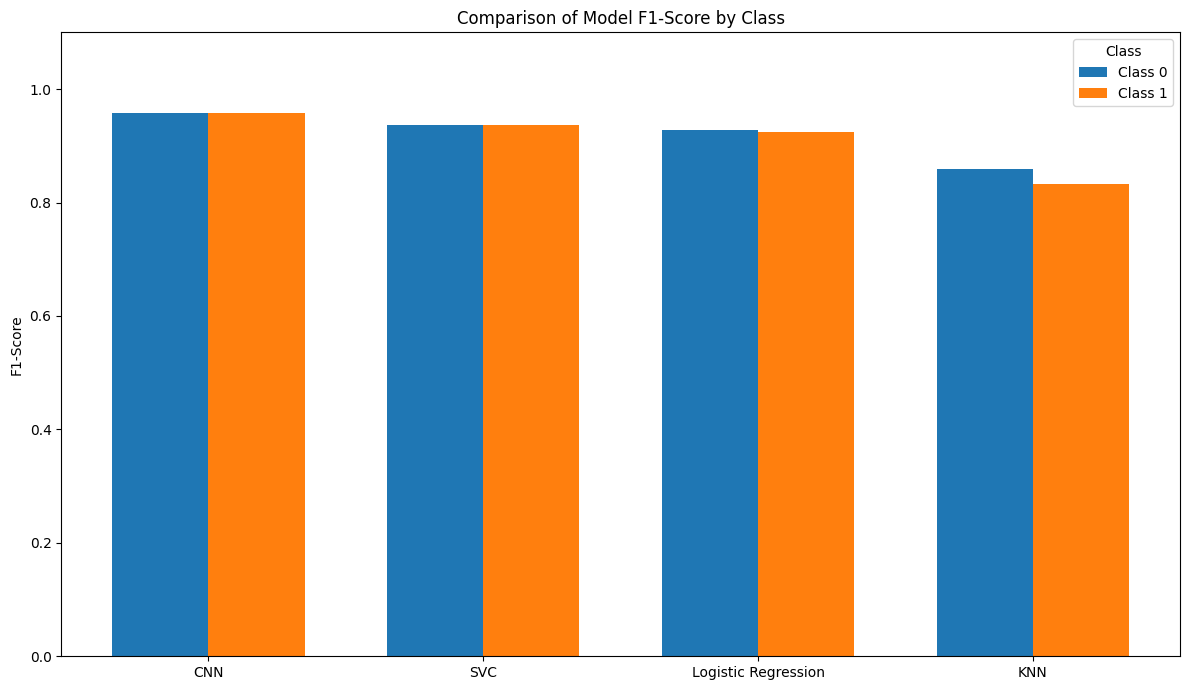

,Model,Class,Precision,Recall,F1-Score
0,CNN,0,0.948454,0.968421,0.958333
1,CNN,1,0.967742,0.947368,0.957447
2,SVC,0,0.932292,0.942105,0.937173
3,SVC,1,0.941489,0.931579,0.936508
4,Logistic Regression,0,0.913265,0.942105,0.927461
5,Logistic Regression,1,0.940217,0.910526,0.925134
6,KNN,0,0.797297,0.931579,0.859223
7,KNN,1,0.917722,0.763158,0.833333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Calculate classification reports for each model, using float keys for classes
report_svc = classification_report(y_test, y_pred, output_dict=True)
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Reshape the test data back to image format for the CNN model
x_test_cnn = x_test.reshape(-1, 64, 64, 3)
# Make predictions with the loaded CNN model
y_pred_cnn = loaded_model.predict(x_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int) # Convert probabilities to binary predictions


# Calculate classification report for CNN, using float keys for classes
report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

# Create a DataFrame to store the metrics
metrics_data = {
    'Model': ['CNN', 'CNN', 'SVC', 'SVC', 'Logistic Regression', 'Logistic Regression', 'KNN', 'KNN'],
    'Class': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [report_cnn['0.0']['precision'], report_cnn['1.0']['precision'],
                  report_svc['0.0']['precision'], report_svc['1.0']['precision'],
                  report_logistic['0.0']['precision'], report_logistic['1.0']['precision'],
                  report_knn['0.0']['precision'], report_knn['1.0']['precision']],
    'Recall': [report_cnn['0.0']['recall'], report_cnn['1.0']['recall'],
               report_svc['0.0']['recall'], report_svc['1.0']['recall'],
               report_logistic['0.0']['recall'], report_logistic['1.0']['recall'],
               report_knn['0.0']['recall'], report_knn['1.0']['recall']],
    'F1-Score': [report_cnn['0.0']['f1-score'], report_cnn['1.0']['f1-score'],
                 report_svc['0.0']['f1-score'], report_svc['1.0']['f1-score'],
                 report_logistic['0.0']['f1-score'], report_logistic['1.0']['f1-score'],
                 report_knn['0.0']['f1-score'], report_knn['1.0']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

# Plotting function for grouped bar charts
def plot_grouped_bar(df, metric, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 7))
    bar_width = 0.35
    models = df['Model'].unique()
    x = np.arange(len(models))

    for i, cls in enumerate(df['Class'].unique()):
        class_data = df[df['Class'] == cls]
        rects = ax.bar(x + i * bar_width, class_data[metric], bar_width, label=f'Class {cls}')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.1)
    ax.legend(title='Class')
    plt.tight_layout()
    plt.show()

# Plot Precision
plot_grouped_bar(metrics_df, 'Precision', 'Precision', 'Comparison of Model Precision by Class')

# Plot Recall
plot_grouped_bar(metrics_df, 'Recall', 'Recall', 'Comparison of Model Recall by Class')

# Plot F1-Score
plot_grouped_bar(metrics_df, 'F1-Score', 'F1-Score', 'Comparison of Model F1-Score by Class')

display(metrics_df)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


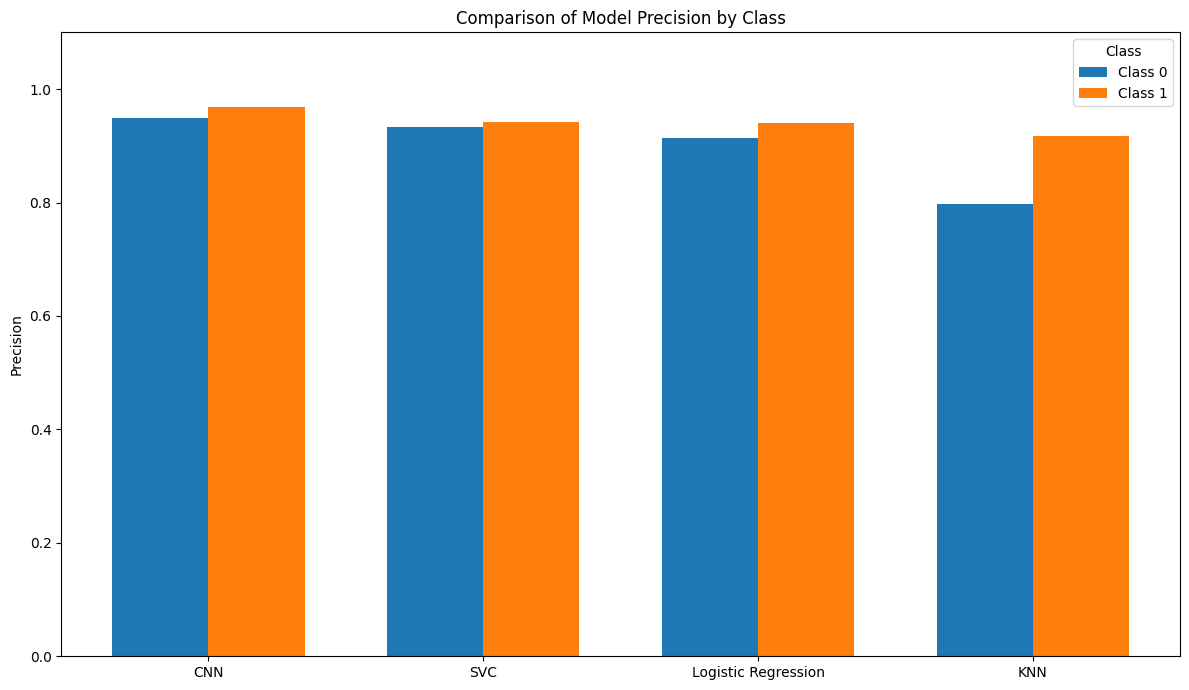

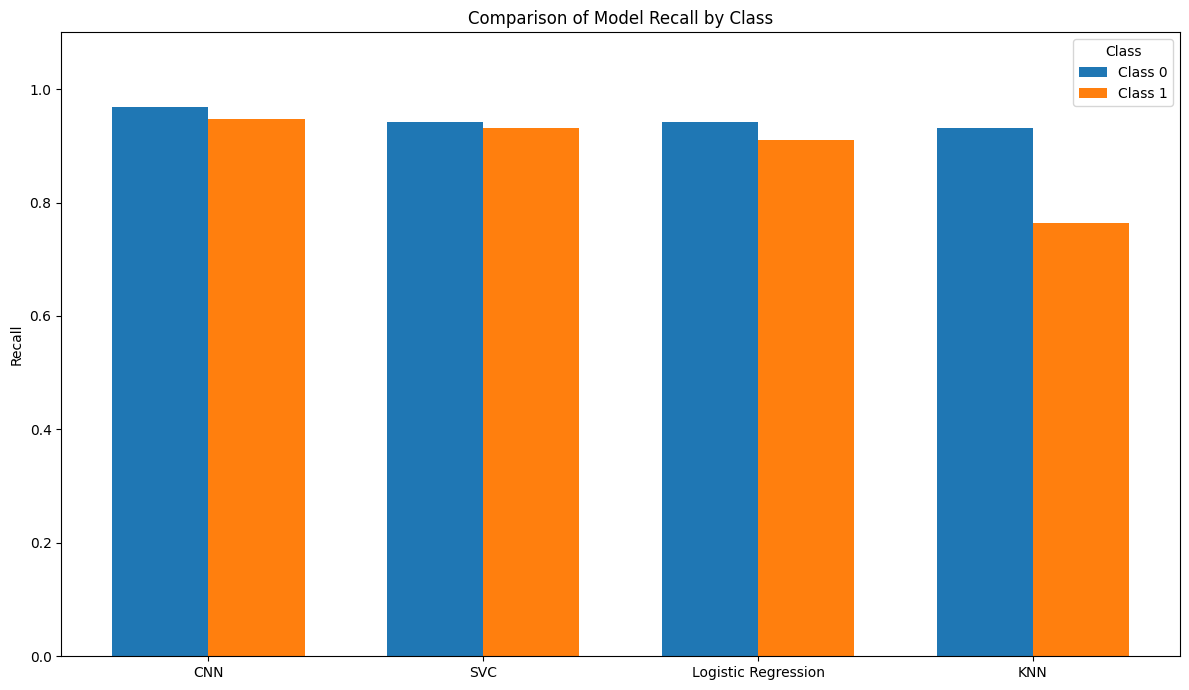

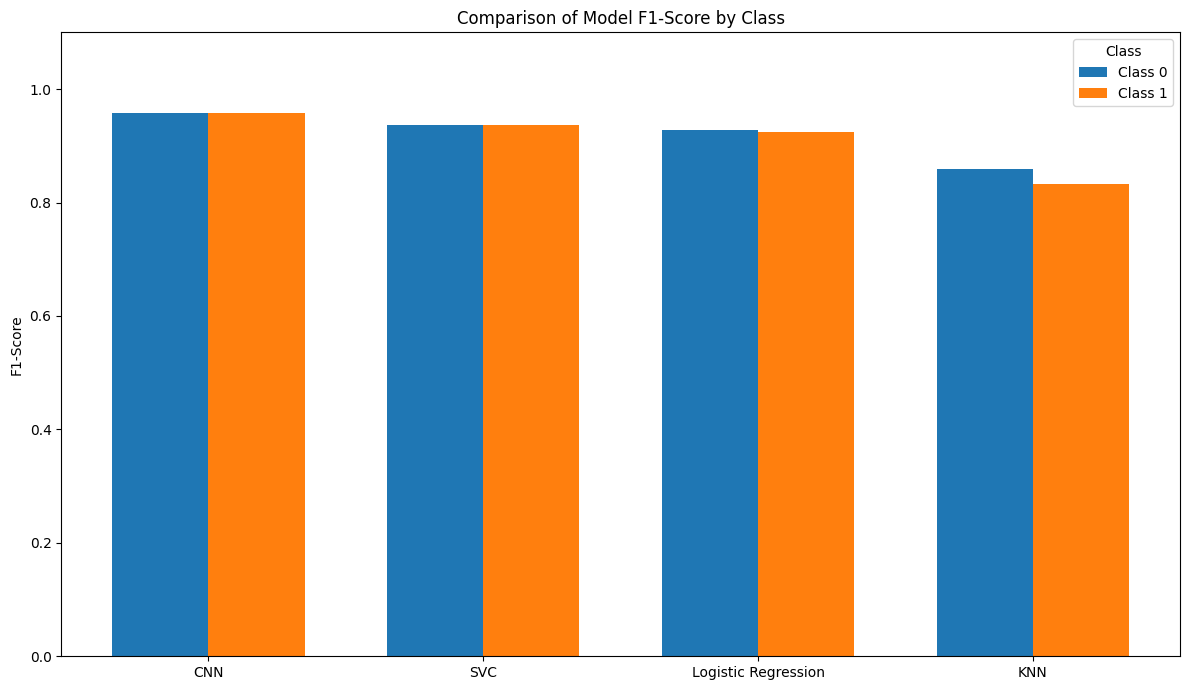

,Model,Class,Precision,Recall,F1-Score
0,CNN,0,0.948454,0.968421,0.958333
1,CNN,1,0.967742,0.947368,0.957447
2,SVC,0,0.932292,0.942105,0.937173
3,SVC,1,0.941489,0.931579,0.936508
4,Logistic Regression,0,0.913265,0.942105,0.927461
5,Logistic Regression,1,0.940217,0.910526,0.925134
6,KNN,0,0.797297,0.931579,0.859223
7,KNN,1,0.917722,0.763158,0.833333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Calculate classification reports for each model
report_svc = classification_report(y_test, y_pred, output_dict=True)
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Reshape the test data back to image format for the CNN model
x_test_cnn = x_test.reshape(-1, 64, 64, 3)
# Make predictions with the loaded CNN model
y_pred_cnn = loaded_model.predict(x_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int) # Convert probabilities to binary predictions

# Calculate classification report for CNN
report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

# Create a DataFrame to store the metrics, using float keys for accessing reports
metrics_data = {
    'Model': ['CNN', 'CNN', 'SVC', 'SVC', 'Logistic Regression', 'Logistic Regression', 'KNN', 'KNN'],
    'Class': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [report_cnn['0.0']['precision'], report_cnn['1.0']['precision'],
                  report_svc['0.0']['precision'], report_svc['1.0']['precision'],
                  report_logistic['0.0']['precision'], report_logistic['1.0']['precision'],
                  report_knn['0.0']['precision'], report_knn['1.0']['precision']],
    'Recall': [report_cnn['0.0']['recall'], report_cnn['1.0']['recall'],
               report_svc['0.0']['recall'], report_svc['1.0']['recall'],
               report_logistic['0.0']['recall'], report_logistic['1.0']['recall'],
               report_knn['0.0']['recall'], report_knn['1.0']['recall']],
    'F1-Score': [report_cnn['0.0']['f1-score'], report_cnn['1.0']['f1-score'],
                 report_svc['0.0']['f1-score'], report_svc['1.0']['f1-score'],
                 report_logistic['0.0']['f1-score'], report_logistic['1.0']['f1-score'],
                 report_knn['0.0']['f1-score'], report_knn['1.0']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

# Plotting function for grouped bar charts
def plot_grouped_bar(df, metric, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 7))
    bar_width = 0.35
    models = df['Model'].unique()
    x = np.arange(len(models))

    for i, cls in enumerate(df['Class'].unique()):
        class_data = df[df['Class'] == cls]
        rects = ax.bar(x + i * bar_width, class_data[metric], bar_width, label=f'Class {cls}')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.1)
    ax.legend(title='Class')
    plt.tight_layout()
    plt.show()

# Plot Precision
plot_grouped_bar(metrics_df, 'Precision', 'Precision', 'Comparison of Model Precision by Class')

# Plot Recall
plot_grouped_bar(metrics_df, 'Recall', 'Recall', 'Comparison of Model Recall by Class')

# Plot F1-Score
plot_grouped_bar(metrics_df, 'F1-Score', 'F1-Score', 'Comparison of Model F1-Score by Class')

display(metrics_df)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


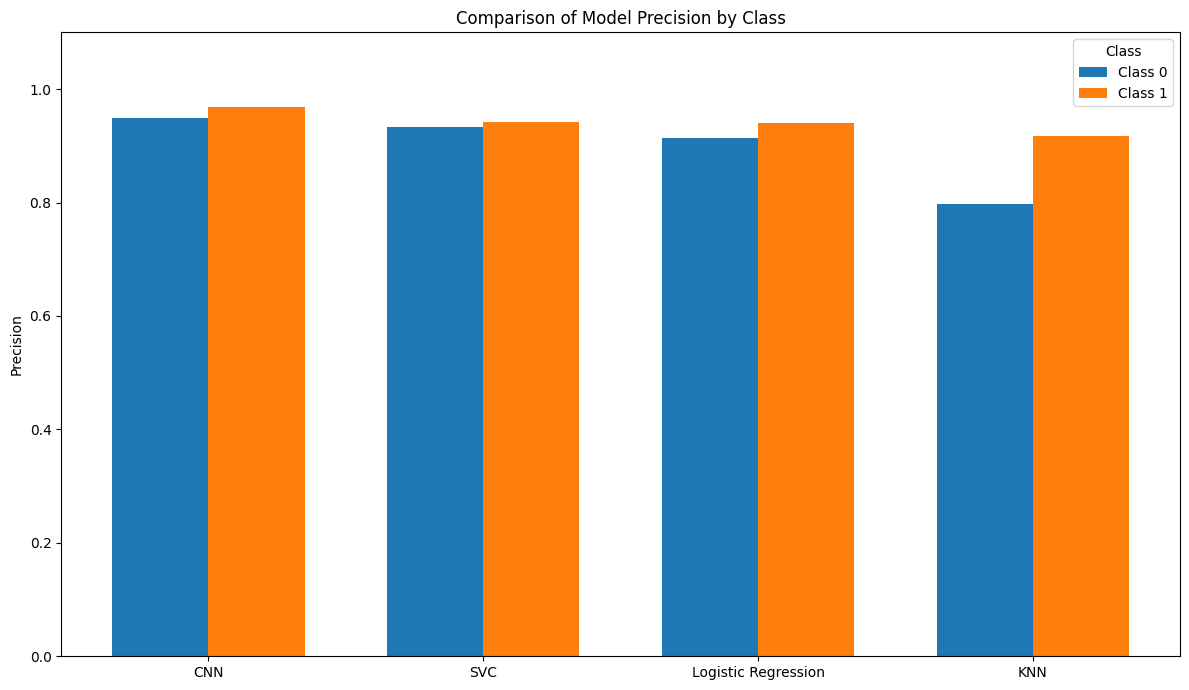

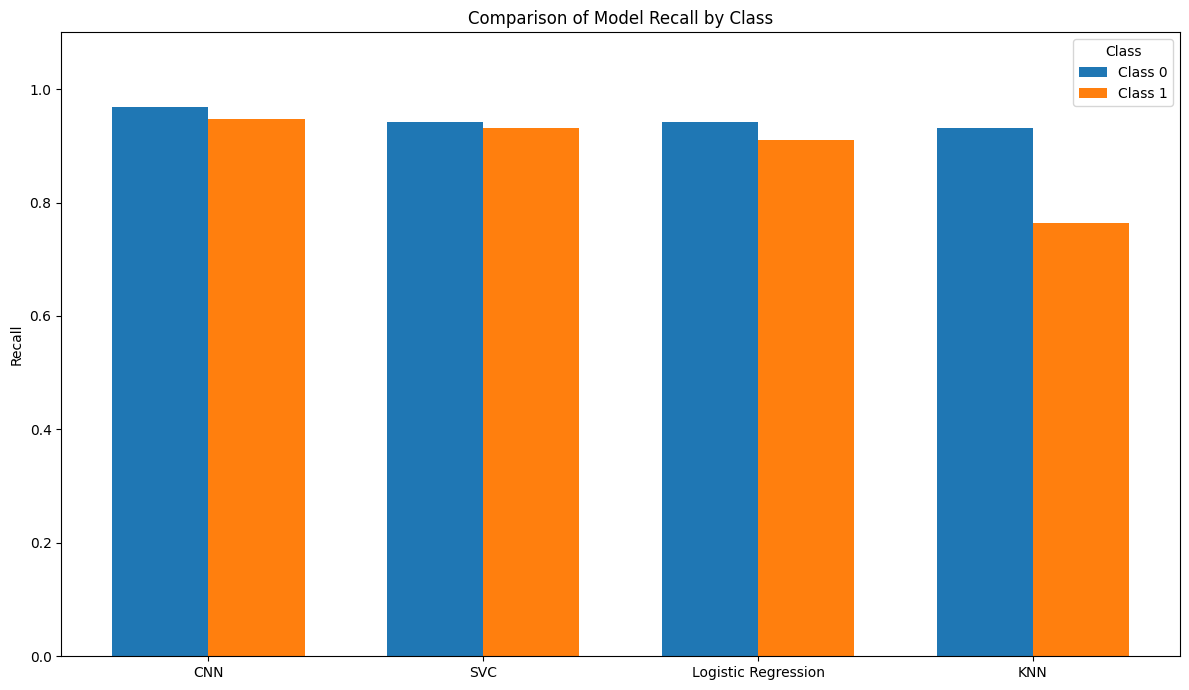

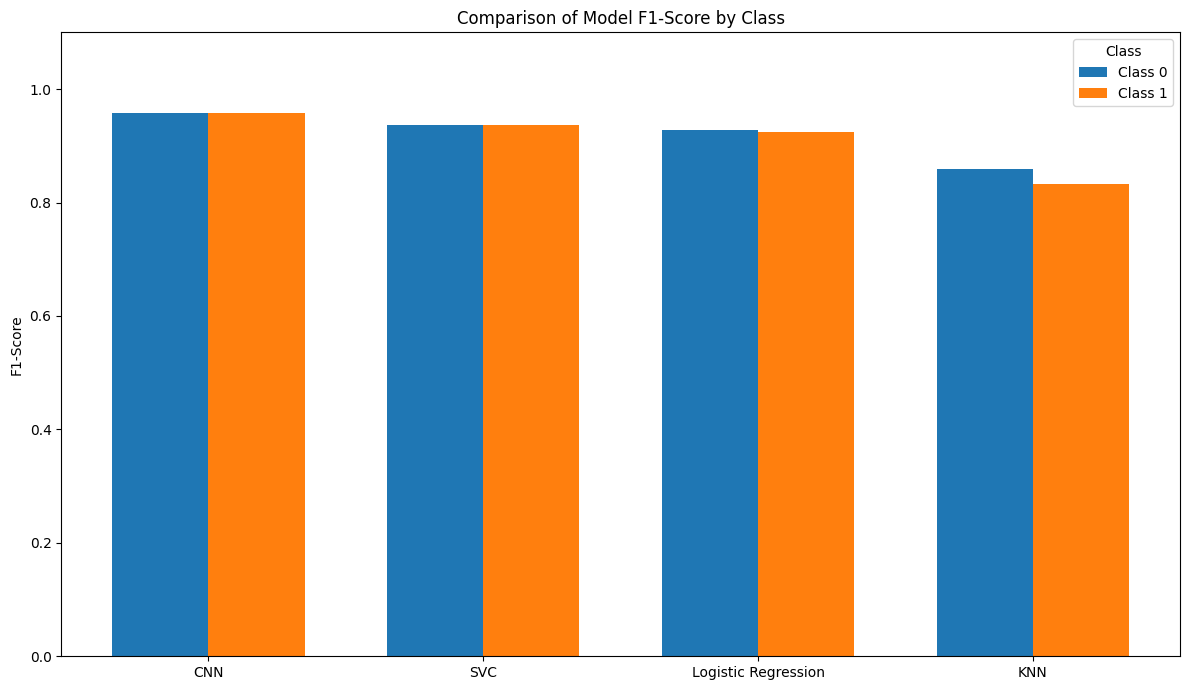

,Model,Class,Precision,Recall,F1-Score
0,CNN,0,0.948454,0.968421,0.958333
1,CNN,1,0.967742,0.947368,0.957447
2,SVC,0,0.932292,0.942105,0.937173
3,SVC,1,0.941489,0.931579,0.936508
4,Logistic Regression,0,0.913265,0.942105,0.927461
5,Logistic Regression,1,0.940217,0.910526,0.925134
6,KNN,0,0.797297,0.931579,0.859223
7,KNN,1,0.917722,0.763158,0.833333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Calculate classification reports for each model, using float keys for classes
report_svc = classification_report(y_test, y_pred, output_dict=True)
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Reshape the test data back to image format for the CNN model
x_test_cnn = x_test.reshape(-1, 64, 64, 3)
# Make predictions with the loaded CNN model
y_pred_cnn = loaded_model.predict(x_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int) # Convert probabilities to binary predictions


# Calculate classification report for CNN, using float keys for classes
report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

# Create a DataFrame to store the metrics
metrics_data = {
    'Model': ['CNN', 'CNN', 'SVC', 'SVC', 'Logistic Regression', 'Logistic Regression', 'KNN', 'KNN'],
    'Class': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [report_cnn['0.0']['precision'], report_cnn['1.0']['precision'],
                  report_svc['0.0']['precision'], report_svc['1.0']['precision'],
                  report_logistic['0.0']['precision'], report_logistic['1.0']['precision'],
                  report_knn['0.0']['precision'], report_knn['1.0']['precision']],
    'Recall': [report_cnn['0.0']['recall'], report_cnn['1.0']['recall'],
               report_svc['0.0']['recall'], report_svc['1.0']['recall'],
               report_logistic['0.0']['recall'], report_logistic['1.0']['recall'],
               report_knn['0.0']['recall'], report_knn['1.0']['recall']],
    'F1-Score': [report_cnn['0.0']['f1-score'], report_cnn['1.0']['f1-score'],
                 report_svc['0.0']['f1-score'], report_svc['1.0']['f1-score'],
                 report_logistic['0.0']['f1-score'], report_logistic['1.0']['f1-score'],
                 report_knn['0.0']['f1-score'], report_knn['1.0']['f1-score']]
}

metrics_df = pd.DataFrame(metrics_data)

# Plotting function for grouped bar charts
def plot_grouped_bar(df, metric, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 7))
    bar_width = 0.35
    models = df['Model'].unique()
    x = np.arange(len(models))

    for i, cls in enumerate(df['Class'].unique()):
        class_data = df[df['Class'] == cls]
        rects = ax.bar(x + i * bar_width, class_data[metric], bar_width, label=f'Class {cls}')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.1)
    ax.legend(title='Class')
    plt.tight_layout()
    plt.show()

# Plot Precision
plot_grouped_bar(metrics_df, 'Precision', 'Precision', 'Comparison of Model Precision by Class')

# Plot Recall
plot_grouped_bar(metrics_df, 'Recall', 'Recall', 'Comparison of Model Recall by Class')

# Plot F1-Score
plot_grouped_bar(metrics_df, 'F1-Score', 'F1-Score', 'Comparison of Model F1-Score by Class')

display(metrics_df)